In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from google.colab import files
import io
from sklearn.model_selection import train_test_split
uploaded = files.upload()

Saving index_prices - Copy.csv to index_prices - Copy (2).csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['index_prices - Copy.csv']))

In [ ]:
print(data.head())

        Date         AGG         TLT  ...        EWW        EWY        EZU
0  9/18/2017  109.860001  126.129997  ...  55.910000  69.839996  43.080002
1  9/19/2017  109.800003  125.820000  ...  55.650002  70.070000  43.290001
2  9/20/2017  109.709999  125.910004  ...  55.860001  69.699997  43.080002
3  9/21/2017  109.690002  125.839996  ...  55.730000  69.690002  43.110001
4  9/22/2017  109.769997  126.199997  ...  55.990002  69.330002  43.200001

[5 rows x 19 columns]


**Question 1a.**

In [ ]:
data_new = data[['Date', 'XLF']]
"percent_change = data_new.diff(axis=0, periods=1)"
data_new['Percent Change'] = data_new['XLF'].diff()
data_new = data_new.loc[1:]
"Up = 1, Down = -1"
data_new['Up or Down?'] = data_new['Percent Change'].apply(lambda x: 1 if x > 0 else -1)
print(data_new.head())

        Date        XLF  Percent Change  Up or Down?
1  9/19/2017  25.250000        0.190001            1
2  9/20/2017  25.400000        0.150000            1
3  9/21/2017  25.459999        0.059999            1
4  9/22/2017  25.430000       -0.029999           -1
5  9/25/2017  25.400000       -0.030000           -1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Question 1b**

In [ ]:
X = data_new['XLF']
y = data_new['Up or Down?']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.9)



We do not train on the whole data set and assess performance on the same set because that will cause overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=50)
x_train_reshape = X_train.values.reshape(-1, 1)
y_train_reshape = y_train.values.reshape(-1, 1)
forest_model.fit(x_train_reshape, y_train_reshape)
y_pred = forest_model.predict(x_test_reshape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score


In [ ]:
"""print(y_test.values.reshape(-1, 1))
print("-------------")
print(y_pred.reshape(-1, 1))"""
y_test_reshape = y_test.values.reshape(-1, 1)
y_pred_reshape = y_pred.reshape(-1, 1)
test_acc = accuracy_score(y_test_reshape, y_pred_reshape)
test_prec = precision_score(y_test_reshape, y_pred_reshape)
test_rec = recall_score(y_test_reshape, y_pred_reshape)
test_f1 = f1_score(y_test_reshape, y_pred_reshape)
print(test_acc)
print(test_prec)
print(test_rec)
print(test_f1)

0.4611973392461197
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Question 1c**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=forest_model, param_grid={'n_estimators': [5,10,50,100,300]}, scoring='accuracy')
grid_search.fit(x_train_reshape, y_train_reshape)
grid_search.best_estimator_


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Random forest leverages the power of multiple decision trees. It does not rely on the feature importance given by a single decision tree.

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.00936456, 0.01570072, 0.07387304, 0.14042158, 0.4020503 ]),
 'mean_score_time': array([0.00114241, 0.00177283, 0.00459514, 0.00947299, 0.02745714]),
 'mean_test_score': array([0.44, 0.38, 0.44, 0.44, 0.44]),
 'param_n_estimators': masked_array(data=[5, 10, 50, 100, 300],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 300}],
 'rank_test_score': array([1, 5, 1, 1, 1], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.6, 0.6, 0.6]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
 'split2_test_score': array([0.3, 0.4, 0.3, 0.3, 0.3]),
 'split3_test_score': array([0.4, 0.2, 0.4, 0.4, 0.4]),
 'split4_test_score': array([0.5, 0.3, 0.4, 0.4, 0.4]),
 'std_fit_time': array([0.00119782, 0.0008798 , 0.00534808, 0.00617985, 0.00744678]),
 'std_score_time': array([4.69759872e-

The mean_test_score that sklearn returns is the mean calculated on all samples where each sample has the same weight.
The std_test_score is the deviation of the test scores from the mean test scores. If we see a large std_test_score, we are less likely to trust the output.



**Question 2**

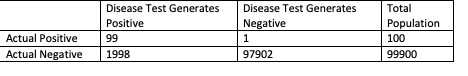

In [ ]:
def test_preciison(true_pos, false_pos):
  return (true_pos / (true_pos + false_pos))
precision = test_preciison(99, 1998)
print(precision)

0.04721030042918455


In [ ]:
def test_recall(true_pos, false_neg):
  return (true_pos / (true_pos + false_neg))
recall = test_recall(99, 1)
print(recall)

0.99


In [ ]:
"f_measure calculates test_accuracy"
def f_measure(prec, rec):
  return (2 * prec * rec) / (prec + rec)
f_measure = f_measure(precision, recall)
print(f_measure)

0.09012289485662267
